In [77]:
import sys
sys.path.append('/home/chris/repos/financial_analysis/')
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from credentials import *
api_key = key

In [12]:
assets = [
    '^GDAXI',#DAX
    '^GSPC', #S&P 500
    '^DJI',  #DowJones 30
    #'^IXIC', #NASDAQ
    '^NYA', #NYSE COMPOSITE (DJ)
    '^XAX',  #NYSE AMEX COMPOSITE INDEX
    #'^BATSK',#BATS 1000 Index
    '^RUT',  #Russell 2000
    '^FTSE', #FTSE 100
    '^FCHI', #CAC 40
    '^STOXX50E', #STOXX 50
    '^N100', #EURONEXT 100
    '^BFX',  #BEL 20 Brussels
    '^N225', #Nikkei
    '^HSI',  #Hangseng   
    'EOAN.DE'
]



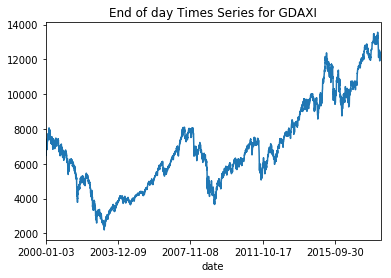

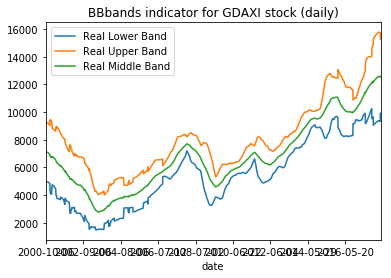

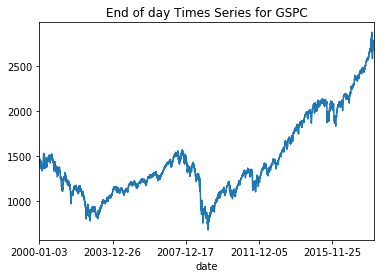

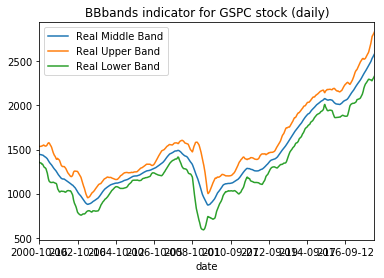

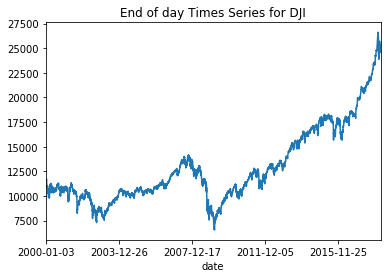

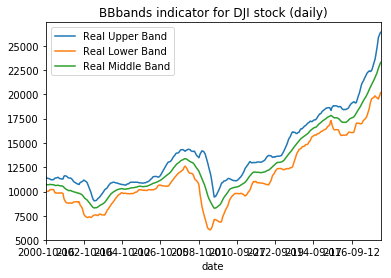

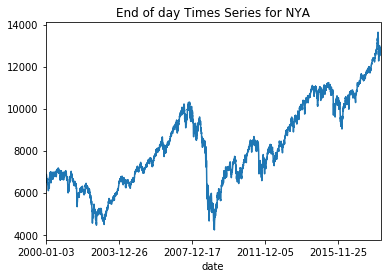

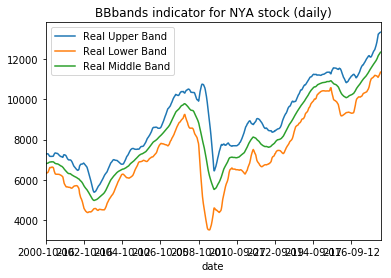

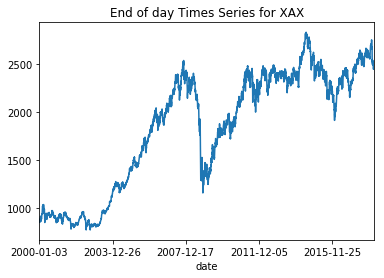

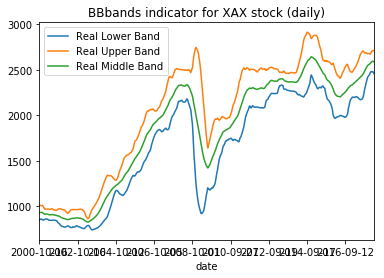

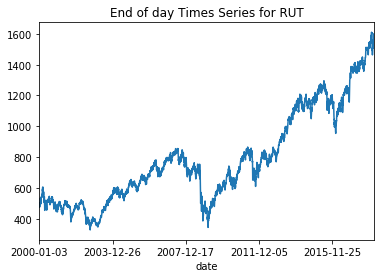

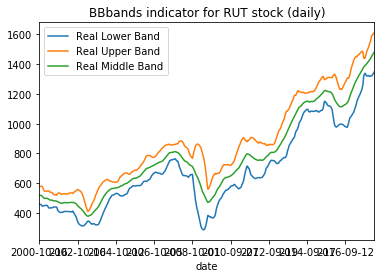

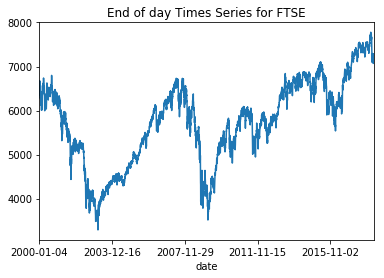

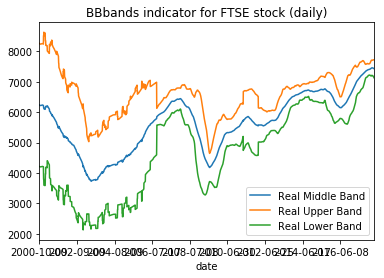

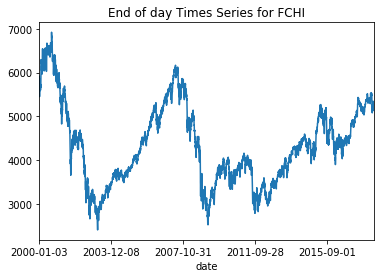

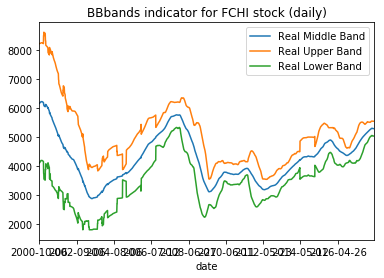

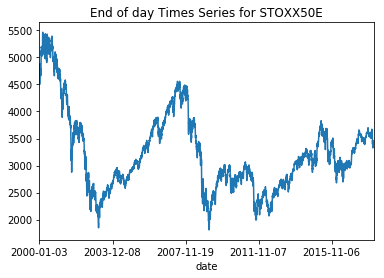

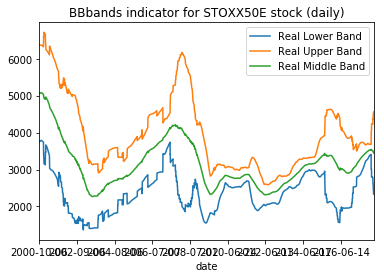

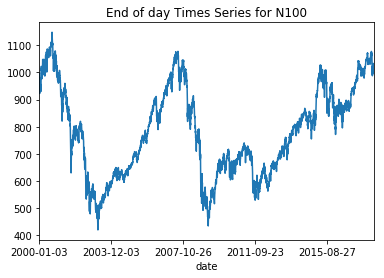

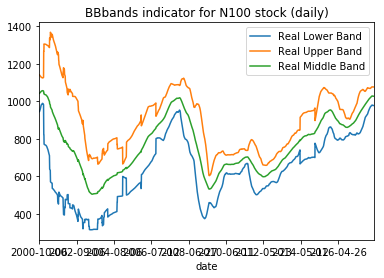

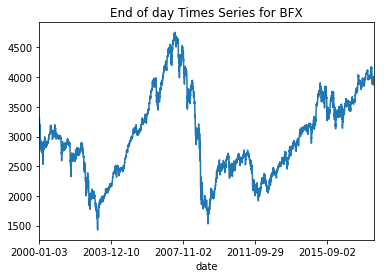

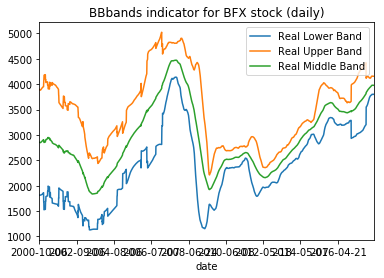

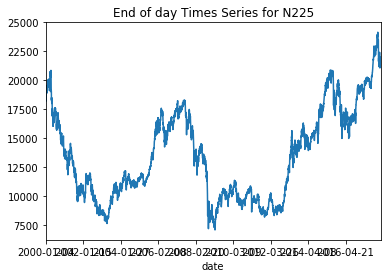

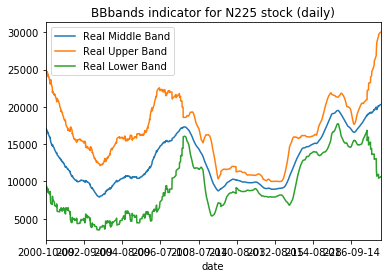

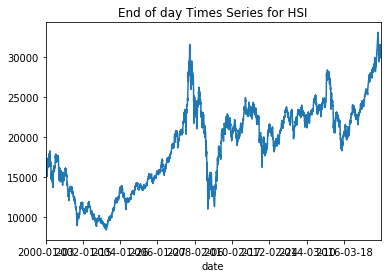

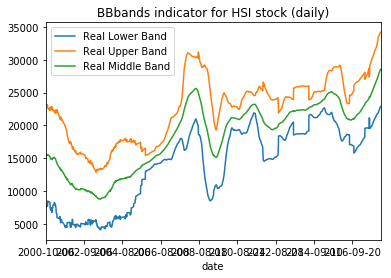

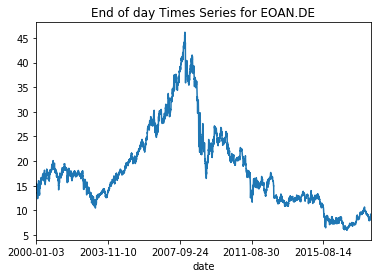

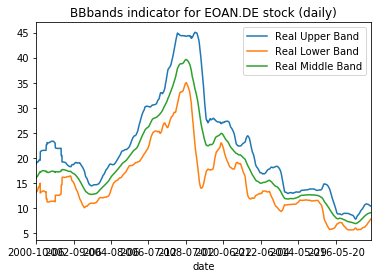

In [49]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
df_price = pd.DataFrame()
df_bbands = pd.DataFrame()
df_adx = pd.DataFrame()
df_cci = pd.DataFrame()
df_aroon = pd.DataFrame()


for asset in assets:
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=asset, outputsize='full')
    data = data.drop('5. volume',axis=1)
    data = data.drop(data.loc[(data==0).any(axis=1)].index)  
    df_price['close_'+asset.strip('^')] = data['4. close']
    data['4. close'].plot()
    plt.title('End of day Times Series for ' + asset.strip('^') )
    plt.show()
    #Read BBand technical indicator
    ti = TechIndicators(key=key, output_format='pandas')
    data, meta_data = ti.get_bbands(symbol=asset, interval='daily', time_period=200)
    df_bbands[data.columns[0] + ' ' + asset.strip('^')] = data[data.columns[0]]
    df_bbands[data.columns[1] + ' ' + asset.strip('^')] = data[data.columns[1]]
    df_bbands[data.columns[2] + ' ' + asset.strip('^')] = data[data.columns[2]]
    data.plot()
    plt.title('BBbands indicator for ' +  asset.strip('^') + ' stock (daily)')
    plt.show()
    #Read ADX technical indicator
    #ti = TechIndicators(key=key, output_format='pandas')
    data, meta_data = ti.get_adx(symbol=asset, interval='daily', time_period=20)
    df_adx[data.columns[0] + ' ' + asset.strip('^')] = data[data.columns[0]]
    #Read CCI technical indicator
    #ti = TechIndicators(key=key, output_format='pandas')
    data, meta_data = ti.get_cci(symbol=asset, interval='daily', time_period=20)
    df_cci[data.columns[0] + ' ' + asset.strip('^')] = data[data.columns[0]]
    #Read AROON technical indicator
    #ti = TechIndicators(key=key, output_format='pandas')
    data, meta_data = ti.get_aroon(symbol=asset, interval='daily', time_period=20)
    df_aroon[data.columns[0] + ' ' + asset.strip('^')] = data[data.columns[0]]

### Concat the dataframes for the last 100 days of trading

In [65]:
df_aroon  = df_aroon.iloc[-100:]
df_cci    = df_cci.iloc[-100:]
df_adx    = df_adx.iloc[-100:]
df_bbands = df_bbands.iloc[-100:]
df_price  = df_price.iloc[-100:]
df_all = pd.concat([df_price,df_aroon, df_cci,df_adx,df_bbands], axis=1)

In [68]:
df_all = df_all.fillna(method='bfill')

## Check for correlations 
* Check for correlations between particular end of day prices
* Check for correlations among the technical indicators 

### The Average Directional Movement Index (ADX) indicator
* Compares the high and low of subsequent days of trade 
* I.e. if the highest price of a day exceeds the high of the previous day, an upward trend is associated 

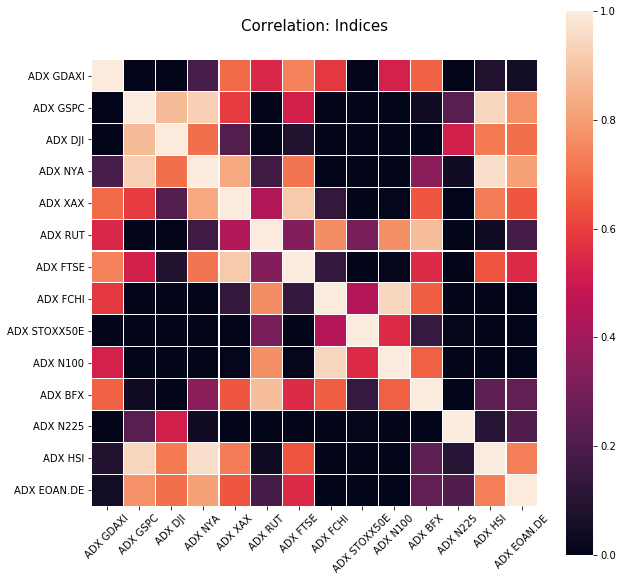

In [78]:
plt.figure(figsize=(10,10))
plt.title('Correlation: ADX', y=1.05, size=15)
plot = sns.heatmap(df_adx.corr(), xticklabels=df_adx.columns, yticklabels=df_adx.columns,  linewidths=0.1,vmax=1.0,vmin=0, square=True, linecolor='white')
#plot.set_xticklabels(plot.get_xticklabels(),rotation=30)
#plot.set_ylabel('')
#plot.set_xlabel('')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.setp(plot.get_yticklabels(), rotation=0)
plt.show()

### Commodity Channel Index 
* The CCI is designed to detect beginning and ending market trends.
* If the price is making new highs, and the CCI is not, then a price correction is likely.

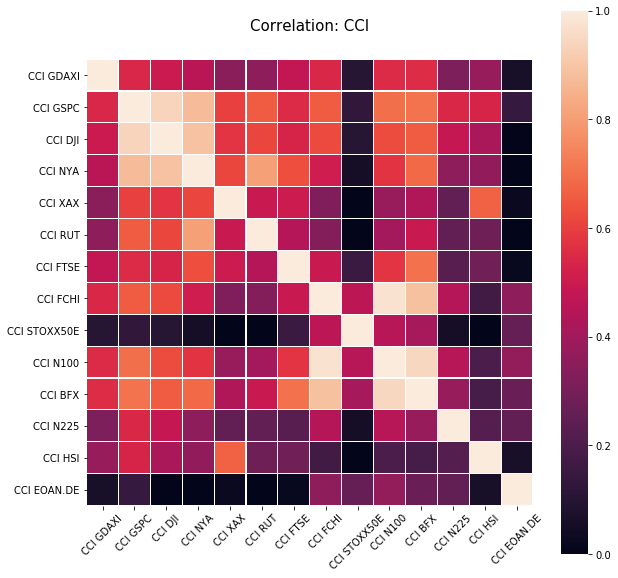

In [79]:
plt.figure(figsize=(10,10))
plt.title('Correlation: CCI', y=1.05, size=15)
plot = sns.heatmap(df_cci.corr(), xticklabels=df_cci.columns, yticklabels=df_cci.columns,  linewidths=0.1,vmax=1.0,vmin=0, square=True, linecolor='white')
#plot.set_xticklabels(plot.get_xticklabels(),rotation=30)
#plot.set_ylabel('')
#plot.set_xlabel('')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.setp(plot.get_yticklabels(), rotation=0)
plt.show()

### Aroon indicator
* The Aroon indicator attempts to show when a new trend is dawning.
* When the Aroon Up is staying between 70 and 100 then it indicates an upward trend. When the Aroon Down is staying between 70 and 100 then it indicates an downward trend. A strong upward trend is indicated when the Aroon Up is above 70 while the Aroon Down is below 30. Likewise, a strong downward trend is indicated when the Aroon Down is above 70 while the Aroon Up is below 30. Also look for crossovers. 

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Correlation: CCI', y=1.05, size=15)
plot = sns.heatmap(df_cci.corr(), xticklabels=df_cci.columns, yticklabels=df_cci.columns,  linewidths=0.1,vmax=1.0,vmin=0, square=True, linecolor='white')
#plot.set_xticklabels(plot.get_xticklabels(),rotation=30)
#plot.set_ylabel('')
#plot.set_xlabel('')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.setp(plot.get_yticklabels(), rotation=0)
plt.show()

In [ ]:
def predictive_model(test_X)
    for neuron_number in np.linspace(20,1000,50)
        # design network
        model = Sequential()
        model.add(LSTM(neuron_number, input_shape=(train_X.shape[1], train_X.shape[2])))
        model.add(Dense(1))
        #model.add(Dense(1, activation='tanh'))
        model.compile(loss='mae', optimizer='adam')
        # fit network
        history = model.fit(train_X, train_y, epochs=200, batch_size=40, validation_data=(test_X, test_y), verbose=2, shuffle=True)
        # plot history
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        pyplot.show()
        yhat = model.predict(test_X)

In [35]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt


    ti = TechIndicators(key=key, output_format='pandas')
    data, meta_data = ti.get_bbands(symbol='MSFT', interval='daily', time_period=200)
    data.plot()
    plt.title('BBbands indicator for  MSFT stock (daily)')
    plt.show()

IndentationError: unexpected indent (<ipython-input-35-6d9a6c3aa311>, line 5)

In [38]:
data.columns[0]

'Real Lower Band'

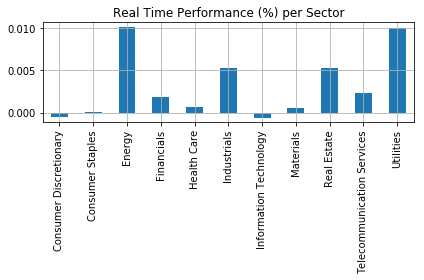

In [14]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key=key, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()